# Problem Set 2

## Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import pytz

### Import data

In [2]:
from google.colab import drive
drive.mount("/content/drive")
!mkdir -p datashim
!cp /content/drive/Shareddrives/DS602-F22/Data/data602.py ./datashim
from datashim import data602

Mounted at /content/drive


In [16]:
cdf = data602.read_citations()
wdf = data602.read_weather()

## Question 1

Using the `weather` dataset, construct a derived data frame having the following qualities:

1. Each row represents an observation day
2. Each column represents an hourly temperature observation.  That is, the dataframe includes 24 columns of the form `tmpmeasx`	where x ranges from 0 to 23 and represents the observation taken that hour.  (For changes from daylight savings time to standard time, there are two observations at the 1:00 hour (local).  You may discard one of the values arbitrarily.)

Using this derived dataset, show the average difference in temperature, standard deviation, and max/min values between observations taken in hours 2 (about 2:56am) and 14 (about 14:56, or 2:56pm).

**Note:** The derived (reshaped) data frame should comprise one row for each distinct date in the data set, and 25 columns (representing date together with 24 hourly measurements).  Assign a new column calculated as the difference between `tmpmeas14` and `tmpmeas2`.  This calculated column represents the temperature increase for the day between 2:56 and 14:56.  Find the summary statistics (mean, max, min, and standard deviation) for this column.

In [4]:
# Convert date to datetime and extract date and hour
wdf['date'] = pd.to_datetime(wdf['date'])
wdf['date_only'] = wdf['date'].dt.date
wdf['hour'] = wdf['date'].dt.hour

wdf = wdf.groupby(['date_only', 'hour'], as_index=False).agg({'tmp_meas': 'first'})

# Pivot the data to get 24 hourly temperature measurements per day
wdf_pivotdf = wdf.pivot(index='date_only', columns='hour', values='tmp_meas')

# Rename columns
wdf_pivotdf.columns = [f'tmpmeas{x}' for x in wdf_pivotdf.columns]

# Ensure there are 24 columns
wdf_pivotdf = wdf_pivotdf.loc[:, [f'tmpmeas{x}' for x in range(24) if f'tmpmeas{x}' in wdf_pivotdf.columns]]

# Add a new column for temperature difference: tmpmeas14 - tmpmeas2
if 'tmpmeas14' in wdf_pivotdf.columns and 'tmpmeas2' in wdf_pivotdf.columns:
    wdf_pivotdf['temp_diff'] = wdf_pivotdf['tmpmeas14'] - wdf_pivotdf['tmpmeas2']
else:
    print("Warning: Some required hourly columns are missing.")

# Calculate summary statistics
summary_stats = wdf_pivotdf['temp_diff'].describe()

# Display
from IPython.display import display
display(wdf_pivotdf)

,tmpmeas0,tmpmeas1,tmpmeas2,tmpmeas3,tmpmeas4,tmpmeas5,tmpmeas6,tmpmeas7,tmpmeas8,tmpmeas9,...,tmpmeas15,tmpmeas16,tmpmeas17,tmpmeas18,tmpmeas19,tmpmeas20,tmpmeas21,tmpmeas22,tmpmeas23,temp_diff
date_only,,,,,,,,,,,,,,,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.2,6.1,6.7,6.1,5.6,NaN
2016-01-01,5.0,4.4,3.9,3.3,3.3,4.4,3.9,3.9,4.4,5.6,...,5.0,4.4,3.9,2.2,1.1,0.6,-0.6,0.6,0.6,1.7
2016-01-02,-0.6,-1.7,-1.7,-0.6,-2.8,-2.2,-2.8,-2.2,1.1,3.3,...,7.8,6.1,3.9,2.2,1.7,0.6,0.0,-1.1,-1.7,10.0
2016-01-03,-1.7,-1.7,-2.2,-2.8,-2.8,-0.6,-1.1,-2.8,1.7,5.6,...,10.6,8.9,5.6,3.9,2.8,1.7,0.6,0.0,-1.1,13.3
2016-01-04,-2.2,-1.7,-2.8,-1.7,0.0,0.0,0.6,0.6,0.6,0.0,...,0.0,-1.7,-2.2,-2.8,-3.3,-5.0,-6.1,-7.2,-8.3,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-28,23.9,23.3,23.3,23.3,23.3,23.3,22.8,23.9,24.4,25.0,...,25.6,25.6,25.0,25.0,24.4,23.9,23.3,23.9,23.9,2.8
2023-08-29,23.9,23.3,23.3,22.8,22.8,22.2,22.8,22.8,22.8,23.3,...,27.2,26.7,26.1,26.1,25.6,25.0,23.9,25.0,24.4,3.9
2023-08-30,23.9,23.9,23.9,23.9,23.3,23.9,23.9,23.9,26.1,26.7,...,30.6,30.6,28.9,27.2,25.6,23.9,23.9,22.8,21.7,6.7


In [5]:
tmp_difference = wdf_pivotdf.tmpmeas14 - wdf_pivotdf.tmpmeas2
tmp_difference.describe()

,0
count,2793.000000
mean,7.187648
std,4.839827
min,-16.100000
25%,3.900000
50%,7.200000
75%,10.500000
max,22.800000


## Question 2

**Circular data and One-Hot Encoding** Using the `Citations` data frame (`cdf`), discard records where the violation timestamp is not between January 1, 2021 and July 1, 2022.

In [6]:
cdf_1 = cdf[(cdf.violdate.dt.date >= datetime(2021,1,1).date())
      & (cdf.violdate.dt.date < datetime(2022,7,1).date())]

Identify the 5 most common violation types.  Remove from the derivative data frame any observation where the violation type is not among these 5 most common

In [7]:
common_violations = cdf_1['violcode'].value_counts().head(5)
common_violations

,count
violcode,
32,688281
30,242994
31,151125
18,128513
22,86342


Identify the average time of day for each violation in the derivative data frame.  (You will need to use the circular mean to compute this average.  Hint: begin by transforming the time of day to an angle on the unit circle, where $0=2\pi$ radians indicates midnight, and $\pi$ radians represents noon.)

Note: the following functions may be useful for this question:

In [8]:
import numpy as np
from typing import Tuple


@np.vectorize
def timetotheta(hr: int, min: int) -> float:
  """ Convert a time of day (hour, minute) to an angle on the unit circle
    (e.g., (12,0) -> pi)
  """
  ratio = (hr * 60 + min) / (23*60+60)
  return ratio * 2 * np.pi

@np.vectorize
def thetatotime(theta: float) -> (int, int):
  """ Convert a an angle on the unit circle to a time
    (e.g., pi -> "12:00")
  """
  theta = theta + (2 * np.pi) if theta < 0 else theta
  elapsedmin = np.round(theta/(2 * np.pi) * 24 * 60)
  hr, min = np.divmod(elapsedmin, 60)
  return f"{int(hr):02d}:{int(min):02d}"

In [9]:
cdf_1["ttheta"] = timetotheta(
            cdf_1.violdate.dt.hour,
            cdf_1.violdate.dt.minute
        )
cdf_1.ttheta

<ipython-input-9-5d9626a9c57b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf_1["ttheta"] = timetotheta(


,ttheta
4632,4.886922
4633,4.450590
4634,4.450590
7770,4.908739
10928,6.195919
...,...
7748711,4.891285
7816491,1.505346
7816492,1.527163
7816493,1.570796


The violation type column is a nominal field.  Convert this field to one-hot encoded (OHE) variables, and add these variables to the data frame.

In [10]:
#calculating sine and cosine compponents
cdf_1["cos_theta"] = np.cos(cdf_1.ttheta)
cdf_1["sine_theta"] = np.sin(cdf_1.ttheta)
avg_time_summ = (
    cdf_1
    .groupby("violcode")
    .agg({"cos_theta": "mean", "sine_theta": "mean"})
    .assign(theta = lambda x: np.arctan2(x.sine_theta, x.cos_theta))
    .assign(avg_time = lambda x: thetatotime(x.theta))
)
avg_time_summ

<ipython-input-10-e11dd1cb717a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf_1["cos_theta"] = np.cos(cdf_1.ttheta)
<ipython-input-10-e11dd1cb717a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf_1["sine_theta"] = np.sin(cdf_1.ttheta)


,cos_theta,sine_theta,theta,avg_time
violcode,,,,
1,-0.864637,0.119214,3.004579,11:29
2,-0.161088,-0.154173,-2.378125,14:55
3,-0.327427,-0.137504,-2.744004,13:31
4,0.016077,0.232850,1.501860,05:44
5,-0.421034,0.077675,2.959157,11:18
6,0.253361,-0.262668,-0.803433,20:56
7,0.737908,0.608285,0.689405,02:38
8,-0.339774,-0.088219,-2.887561,12:58
9,0.048994,-0.564588,-1.484234,18:20


In [11]:
#Adding the description field. We see that the average violation time is mid-day.
viol_ref = cdf_1[["violcode", "description"]].drop_duplicates()
pd.merge(avg_time_summ.reset_index(),
         viol_ref,
         on="violcode",
         how="inner")[["violcode", "description", "avg_time"]]

,violcode,description,avg_time
0,1,Abandonded Vehicle,11:29
1,2,No Stopping or No Parking Pimlico Event,14:55
2,3,Obstruct/Impeding Flow of Traffic,13:31
3,4,Snow Emergency Route Violation,05:44
4,5,Obstruct/Impeding Movement of Pedestrian,11:18
5,6,Fire Lane/Handicapped Violation,20:56
6,7,Parking or Parking Meter Tow-Away zone,02:38
7,8,No Stopping/Standing Tow Away Zone,12:58
8,9,"Commercial Veh/Residence over 20,000 lbs",18:20
9,10,"Commercial Veh/Residence under 20,000 lbs",17:41


In [12]:
dum_values= pd.get_dummies(cdf_1.violcode)# violation type column is a nominal field. Convert this field to one-hot encoded (OHE) variables, and add these variables to the data frame.
dum_values.columns = [f"violcd_{cd}" for cd in dum_values.columns]
pd.concat([cdf_1, dum_values], axis=1)

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,ttheta,...,violcd_42,violcd_43,violcd_44,violcd_45,violcd_46,violcd_47,violcd_50,violcd_51,violcd_52,violcd_99
4632,001713171,N73LDS,NJ,12,No Stopping/Standing Not Tow-Away Zone,32,2021-01-31 18:40:00-05:00,,2021-01-31 18:40:00,4.886922,...,False,False,False,False,False,False,False,False,False,False
4633,001713189,9ET0286,MD,99,All Other Stopping or Parking Violations,32,2021-12-29 17:00:00-05:00,,2021-12-29 17:00:00,4.450590,...,False,False,False,False,False,False,False,False,False,True
4634,001713197,9EP2809,MD,99,All Other Stopping or Parking Violations,32,2021-12-29 17:00:00-05:00,,2021-12-29 17:00:00,4.450590,...,False,False,False,False,False,False,False,False,False,True
7770,003481843,3EJ7926,MD,99,All Other Stopping or Parking Violations,32,2021-08-27 18:45:00-04:00,,2021-08-27 18:45:00,4.908739,...,False,False,False,False,False,False,False,False,False,True
10928,000130278,19213CD,MD,27,No Stop/Park Street Cleaning,52,2021-06-06 23:40:00-04:00,"(39.28997272, -76.61002178)",2021-06-06 23:40:00,6.195919,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7748711,040091366,6EN4856,MD,37,Truck Overheight Second Violation,125,2021-08-26 18:41:00-04:00,,2021-08-26 18:41:00,4.891285,...,False,False,False,False,False,False,False,False,False,False
7816491,006227442,5AD5724,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-09-22 05:45:00-04:00,,2021-09-22 05:45:00,1.505346,...,False,False,False,False,False,False,False,False,False,False
7816492,006227459,5EB6003,MD,12,No Stopping/Standing Not Tow-Away Zone,32,2021-09-22 05:50:00-04:00,,2021-09-22 05:50:00,1.527163,...,False,False,False,False,False,False,False,False,False,False
7816493,006227467,2DY7222,MD,17,Less Than 15 feet from Fire Hydrant,77,2021-09-22 06:00:00-04:00,,2021-09-22 06:00:00,1.570796,...,False,False,False,False,False,False,False,False,False,False


## Question 3
 Join the citations and weather datasets to produce a merged data frame.  The merged data frame should provide, for each citation, the reported weather conditions for the closest weather observation.

In [13]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7891745 entries, 0 to 7891744
Data columns (total 9 columns):
 #   Column       Dtype                     
---  ------       -----                     
 0   citation     string                    
 1   tag          string                    
 2   state        string                    
 3   violcode     int64                     
 4   description  category                  
 5   violfine     int64                     
 6   violdate     datetime64[ns, US/Eastern]
 7   location     string                    
 8   violdtl      datetime64[ns]            
dtypes: category(1), datetime64[ns, US/Eastern](1), datetime64[ns](1), int64(2), string(4)
memory usage: 489.2 MB


In [14]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67195 entries, 0 to 67194
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date_only  67195 non-null  object 
 1   hour       67195 non-null  int32  
 2   tmp_meas   67193 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.3+ MB


In [18]:
# Converting 'violdate' and 'date' columns to datetime and removing timezone
cdf = data602.read_citations()
wdf = data602.read_weather()
cdf['violdate'] = pd.to_datetime(cdf['violdate']).dt.tz_convert(None).astype('datetime64[ns]')
wdf['date'] = pd.to_datetime(wdf['date']).dt.tz_convert(None).astype('datetime64[ns]')
# Sorting both datasets by timestamp
cdf = cdf.sort_values('violdate')
wdf = wdf.sort_values('date')
merged_mdf = pd.merge_asof(cdf, wdf, left_on="violdate", right_on="date", direction="nearest")
merged_mdf.head()

,citation,tag,state,violcode,description,violfine,violdate,location,violdtl,date,wnd_speed,tmp_meas,precip,precip_intensity,cloudcover,tstorm,winter,mist,fog
0,040231789,YRJ641,MD,30,Red Light Violation,75,1999-07-27 08:11:00,,1999-07-27 04:11:00,2016-01-01 00:54:00,1.5,7.2,0.0,0,4.0,0,0,0,0
1,041021270,GES259,MD,30,Red Light Violation,75,2000-05-26 18:41:00,,2000-05-26 14:41:00,2016-01-01 00:54:00,1.5,7.2,0.0,0,4.0,0,0,0,0
2,041036682,CYX244,MD,30,Red Light Violation,75,2000-06-01 22:59:59,,2000-06-01 18:59:59,2016-01-01 00:54:00,1.5,7.2,0.0,0,4.0,0,0,0,0
3,041379157,DYH813,MD,30,Red Light Violation,75,2000-08-26 05:47:00,,2000-08-26 01:47:00,2016-01-01 00:54:00,1.5,7.2,0.0,0,4.0,0,0,0,0
4,043219849,A006827,MD,30,Red Light Violation,75,2002-01-26 14:11:59,,2002-01-26 09:11:59,2016-01-01 00:54:00,1.5,7.2,0.0,0,4.0,0,0,0,0


From this joined data set, examine instances of fixed speed camera citations (violation type 32).  Does weather affect citation volumes?  Justify your conclusion. [Note: your response need not be statistically sound; it is sufficient to justify your conclusion through visual or descriptive analysis.]

In [19]:
merged_mdf = merged_mdf[merged_mdf.violcode == 32]
#renaming the date column to reflect the weather observation timestamps
merged_mdf = merged_mdf.rename({"date": "wobsts"}, axis=1)
merged_mdf = merged_mdf.assign(
    badweather = lambda r: (r.precip_intensity > 0) |
       (r.precip > 0) |
       (r.tstorm + r.winter + r.fog > 0))
mdf_sum = (merged_mdf
          .groupby(["wobsts", "badweather"])
          .agg({"citation": "count"})
          .reset_index()
          .rename({"citation": "count"}, axis=1))

In [20]:
#For each hour of the day, the number of citations during bad weather and normal conditions:
mdf_sum = mdf_sum.assign(hr = mdf_sum.wobsts.dt.hour, dow = mdf_sum.wobsts.dt.weekday)
mdf_sum


,wobsts,badweather,count,hr,dow
0,2016-01-01 00:54:00,False,97429,0,4
1,2017-07-31 09:54:00,False,25,9,0
2,2017-07-31 10:54:00,False,91,10,0
3,2017-07-31 11:54:00,False,91,11,0
4,2017-07-31 12:54:00,False,121,12,0
...,...,...,...,...,...
22976,2023-07-27 17:54:00,False,242,17,3
22977,2023-07-27 18:54:00,False,239,18,3
22978,2023-07-27 19:54:00,False,193,19,3
22979,2023-07-27 20:54:00,False,150,20,3


In [21]:
#weather summary
speed_camera_df = merged_mdf[merged_mdf['violcode'] == 32]

weather_sum = speed_camera_df.groupby(['tstorm', 'winter', 'mist', 'fog'])['citation'].count().reset_index()
weather_sum.columns = ['Thunderstorm', 'Winter Conditions', 'Mist', 'Fog', 'Citation Count']

print(weather_sum)

   Thunderstorm  Winter Conditions  Mist  Fog  Citation Count
0             0                  0     0    0         2864925
1             0                  0     0    1            8696
2             0                  0     1    0          153530
3             0                  0     1    1            1663
4             0                  1     0    0            5887
5             0                  1     0    1             111
6             0                  1     1    0            4786
7             1                  0     0    0           12650
8             1                  0     0    1             931
9             1                  0     1    0            2348


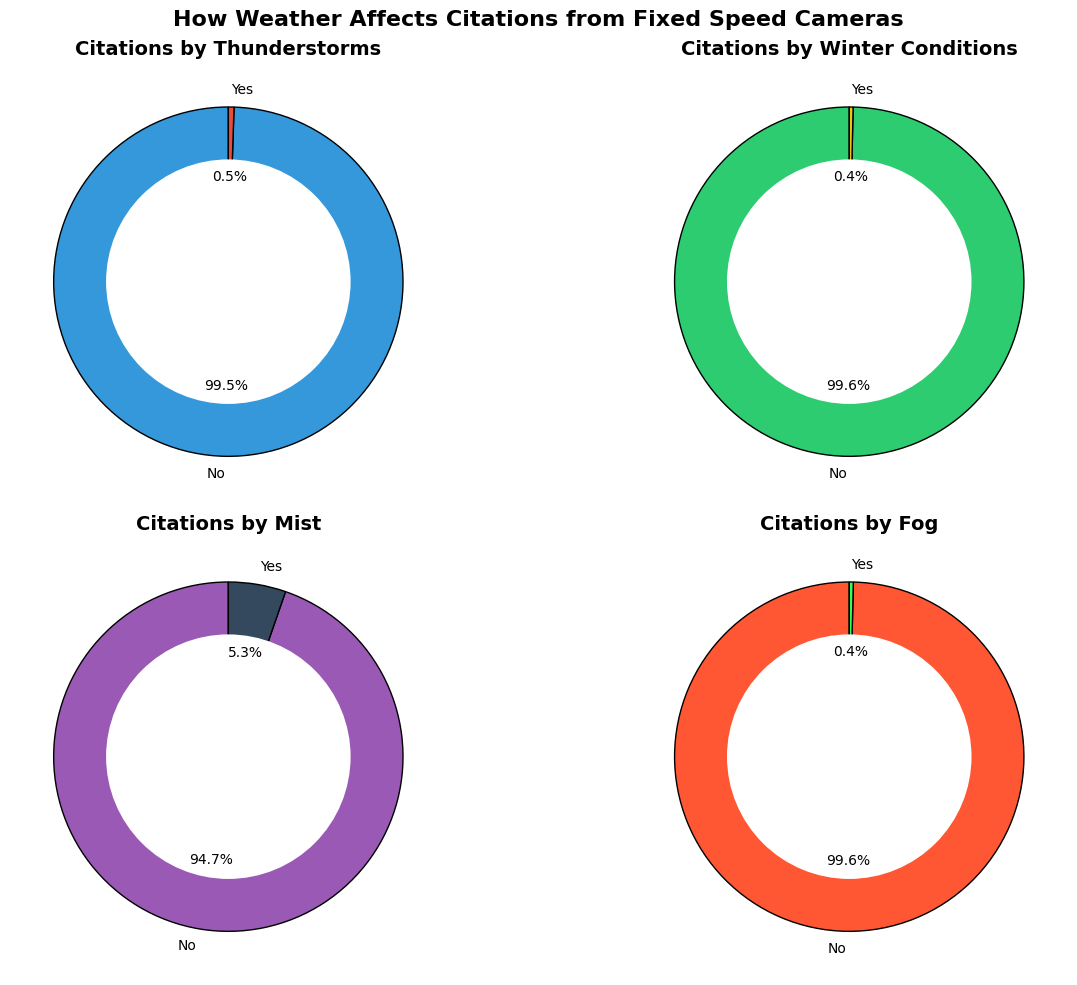

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # Set up a 2x2 subplot layout
fig.suptitle("How Weather Affects Citations from Fixed Speed Cameras", fontsize=16, fontweight='bold')

# Weather variables
weather_vars = ['tstorm', 'winter', 'mist', 'fog']
titles = ["Thunderstorms", "Winter Conditions", "Mist", "Fog"]

# Custom color palettes
colors_list = [["#3498db", "#e74c3c"],  # Blue & Red
               ["#2ecc71", "#f1c40f"],  # Green & Yellow
               ["#9b59b6", "#34495e"],  # Purple & Dark Gray
               ["#ff5733", "#33ff57"]]  # Orange & Green

for i, var in enumerate(weather_vars):
    ax = axes[i // 2, i % 2]
    counts = speed_camera_df[var].value_counts()

    # Donut chart (Pie chart with center hole)
    wedges, texts, autotexts = ax.pie(
        counts, labels=["No", "Yes"], autopct='%1.1f%%', colors=colors_list[i], startangle=90, wedgeprops={'edgecolor': 'black'}
    )

    # Adding a circle in the center to create a donut effect
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    ax.add_artist(centre_circle)

    ax.set_title(f"Citations by {titles[i]}", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()
